In [1]:
import multiprocessing
import sys
from pettingzoo.test import parallel_api_test
from citylearn import GridLearn
from citylearn import MyEnv
from pathlib import Path
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3 import PPO
import gym
import numpy as np
import supersuit as ss

import time

# multiprocessing.set_start_method("fork")

climate_zone = 1
data_path = Path("../citylearn/data/Climate_Zone_"+str(climate_zone))
buildings_states_actions = '../citylearn/buildings_state_action_space.json'

config = {
    "model_name":"small_test",
    "data_path":data_path,
    "climate_zone":climate_zone,
    "buildings_states_actions_file":buildings_states_actions,
    "hourly_timesteps":4,
#     "percent_rl":0.1,
    "percent_rl":1,
    "nclusters":4,
#     "max_num_houses":None
    "max_num_houses":12
}

grid = GridLearn(**config)

envs = [MyEnv(grid) for _ in range(config['nclusters'])]

print('padding action/observation spaces...')
envs = [ss.pad_action_space_v0(env) for env in envs]
envs = [ss.pad_observations_v0(env) for env in envs]

print('creating pettingzoo env...')
envs = [ss.pettingzoo_env_to_vec_env_v0(env) for env in envs]

print('stacking vec env...')
nenvs = 2
envs = [ss.concat_vec_envs_v0(env, nenvs, num_cpus=1, base_class='stable_baselines3') for env in envs]


/Users/aislingpigott/Documents/CityLearn/citylearn/energy_models.py:552: RuntimeWarning: divide by zero encountered in true_divide
  self.cooling_device.cop_cooling = self.cooling_device.eta_tech*(np.add(self.cooling_device.t_target_cooling,273.15))/np.subtract(self.sim_results['t_out'],self.cooling_device.t_target_cooling)
/Users/aislingpigott/Documents/CityLearn/citylearn/energy_models.py:552: RuntimeWarning: divide by zero encountered in true_divide
  self.cooling_device.cop_cooling = self.cooling_device.eta_tech*(np.add(self.cooling_device.t_target_cooling,273.15))/np.subtract(self.sim_results['t_out'],self.cooling_device.t_target_cooling)
/Users/aislingpigott/Documents/CityLearn/citylearn/energy_models.py:552: RuntimeWarning: divide by zero encountered in true_divide
  self.cooling_device.cop_cooling = self.cooling_device.eta_tech*(np.add(self.cooling_device.t_target_cooling,273.15))/np.subtract(self.sim_results['t_out'],self.cooling_device.t_target_cooling)
/Users/aislingpigott/D

padding action/observation spaces...
creating pettingzoo env...
stacking vec env...


In [2]:
from copy import deepcopy
grid2 = deepcopy(grid)

In [3]:
grids = [grid, grid2]

In [4]:
print('setting the grid...')
for env in envs:
    for n in range(nenvs):
        env.venv.vec_envs[n].par_env.aec_env.env.env.env.env.grid = grids[n]
        env.venv.vec_envs[n].par_env.aec_env.env.env.env.env.initialize_rbc_agents()

setting the grid...


In [5]:
env.venv.vec_envs[n].par_env.aec_env.env.env.env.env.grid.net.ext_grid.at[0,'vm_pu'] = 1.02

In [6]:
models = [PPO(MlpPolicy, env, verbose=2, gamma=0.999, batch_size=2, n_steps=1, ent_coef=0.01, learning_rate=0.00025, vf_coef=0.5, max_grad_norm=0.5, gae_lambda=0.95, n_epochs=4, clip_range=0.2, clip_range_vf=1) for env in envs]

Using cpu device
Using cpu device
Using cpu device
Using cpu device


In [20]:
dir(models[0])

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_current_progress_remaining',
 '_episode_num',
 '_excluded_save_params',
 '_get_eval_env',
 '_get_torch_save_params',
 '_init_callback',
 '_last_dones',
 '_last_obs',
 '_last_original_obs',
 '_n_updates',
 '_setup_learn',
 '_setup_lr_schedule',
 '_setup_model',
 '_total_timesteps',
 '_update_current_progress_remaining',
 '_update_info_buffer',
 '_update_learning_rate',
 '_vec_normalize_env',
 '_wrap_env',
 'action_noise',
 'action_space',
 'batch_size',
 'clip_range',
 'clip_range_vf',
 'collect_rollouts',
 'device',
 'ent_coef',
 'env',
 'ep_info_buffer',
 'ep_success_

In [17]:
for e in envs:
#     print(e.venv.vec_envs[n].par_env.aec_env.env.env.env.env.agents, e.venv.vec_envs[n].par_env.aec_env.env.env.env.env.rbc_buildings)
    print(e.venv.vec_envs[n].par_env.aec_env.env.env.env.env.grid.net.load['p_mw'])

0     0.006063
1     0.042300
2     0.006765
3     0.006774
4     0.001505
5     0.014772
6     0.006259
7     0.006827
8     0.006488
9     0.049392
10    0.006735
11    0.015067
Name: p_mw, dtype: float64
0     0.006063
1     0.042300
2     0.006765
3     0.006774
4     0.001505
5     0.014772
6     0.006259
7     0.006827
8     0.006488
9     0.049392
10    0.006735
11    0.015067
Name: p_mw, dtype: float64
0     0.006063
1     0.042300
2     0.006765
3     0.006774
4     0.001505
5     0.014772
6     0.006259
7     0.006827
8     0.006488
9     0.049392
10    0.006735
11    0.015067
Name: p_mw, dtype: float64
0     0.006063
1     0.042300
2     0.006765
3     0.006774
4     0.001505
5     0.014772
6     0.006259
7     0.006827
8     0.006488
9     0.049392
10    0.006735
11    0.015067
Name: p_mw, dtype: float64


In [21]:
for _ in range(1):
    for model in models:
        model.learn(1, reset_num_timesteps=False)

<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 1            |
|    time_elapsed         | 0            |
|    total_timesteps      | 12           |
| train/                  |              |
|    approx_kl            | -0.005277872 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    clip_range_vf        | 1            |
|    entropy_loss         | -7.09        |
|    explained_variance   | 0.952        |
|    learning_rate        | 0.00025      |
|    loss                 | -0.0696      |
|    n_updates            | 20           |
|    policy_gradient_loss | -0.00392     |
|    std                  | 1            |
|    value_loss           | 0.00117      |
------------------------------------------
<class 'supersuit.aec_wrappers.pad_obser

In [ ]:
Name: p_mw, dtype: float64
0     0.006063
1     0.042300
2     0.006765
3     0.006774
4     0.001505
5     0.014772
6     0.006259
7     0.006827
8     0.006488
9     0.049392
10    0.006735
11    0.015067

In [22]:
for e in envs:
#     print(e.venv.vec_envs[n].par_env.aec_env.env.env.env.env.agents, e.venv.vec_envs[n].par_env.aec_env.env.env.env.env.rbc_buildings)
    print(e.venv.vec_envs[n].par_env.aec_env.env.env.env.env.grid.net.load['p_mw'])

0     0.006380
1     0.006682
2     0.030658
3     0.006920
4     0.001533
5     0.025480
6     0.019058
7     0.006847
8     0.006741
9     0.006956
10    0.006293
11    0.006603
Name: p_mw, dtype: float64
0     0.006380
1     0.006682
2     0.030658
3     0.006920
4     0.001533
5     0.025480
6     0.019058
7     0.006847
8     0.006741
9     0.006956
10    0.006293
11    0.006603
Name: p_mw, dtype: float64
0     0.006380
1     0.006682
2     0.030658
3     0.006920
4     0.001533
5     0.025480
6     0.019058
7     0.006847
8     0.006741
9     0.006956
10    0.006293
11    0.006603
Name: p_mw, dtype: float64
0     0.006380
1     0.006682
2     0.030658
3     0.006920
4     0.001533
5     0.025480
6     0.019058
7     0.006847
8     0.006741
9     0.006956
10    0.006293
11    0.006603
Name: p_mw, dtype: float64


In [14]:
envs[0].agents

AttributeError: agents

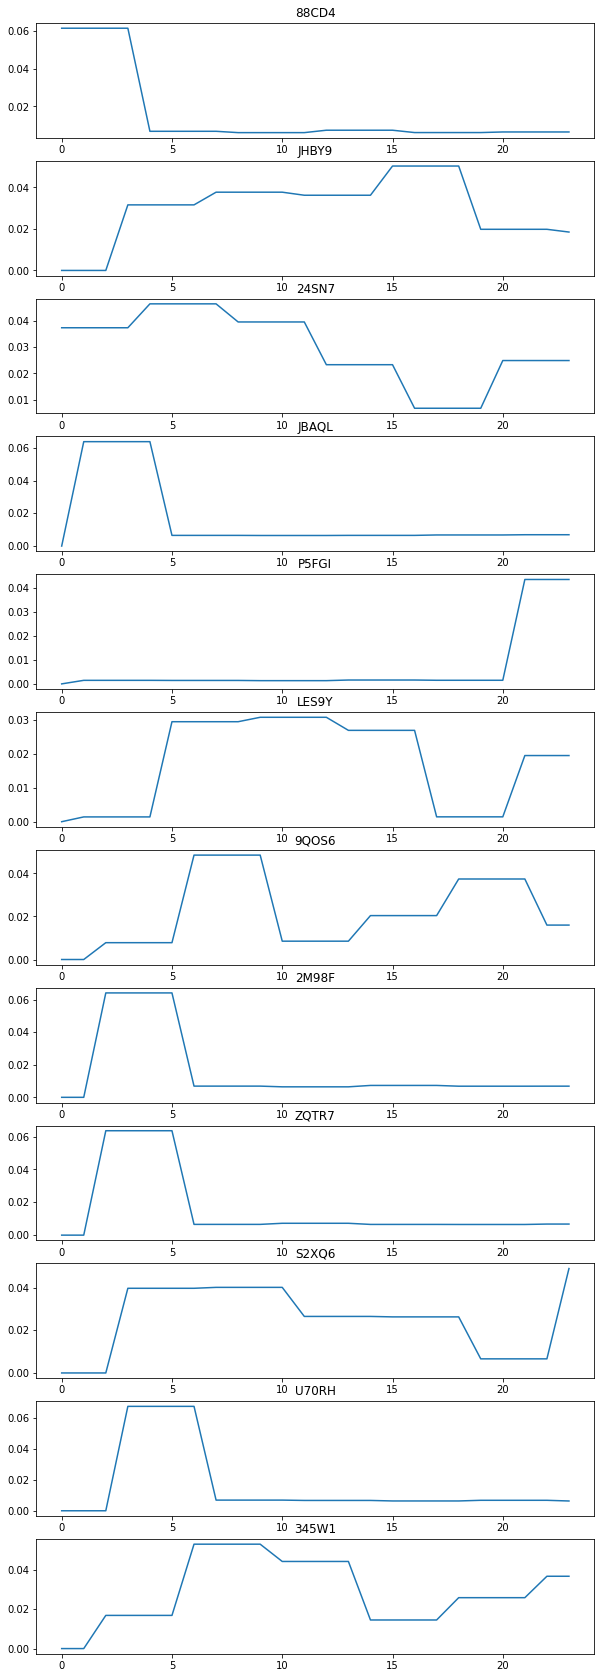

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(12, figsize=(10,30))

for i in range(12):
    ax[i].plot(np.arange(24), np.array(grid.load_data)[:,i])
    ax[i].set_title(list(grid.buildings.keys())[i])
    
plt.show()

In [37]:
from collections import Counter

types = [v.building_type for v in grid.buildings.values()]
Counter(types)

Counter({5: 10, 3: 2})

In [ ]:
obss = [env.reset() for env in envs]
for _ in range(5):
    for m in range(len(models)):
        
        # get the current observation from the perspective of this team
        foo = []
        for e in range(nenvs):
            bar = list(envs[m].venv.vec_envs[e].par_env.aec_env.env.state().values())
            for i in range(len(bar)):
                while len(bar[i]) < 19:
                    bar[i] = np.append(bar[i], 0)
            foo += bar

        foo = np.vstack(foo)
        obss[m] = np.vstack(foo)

        action = models[m].predict(obss[m])[0]
        obss[m], reward, done, info = envs[m].step(action)
        print("reward",np.sum(reward))